In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
import json

In [4]:
lacar_url='https://data.cityofnewyork.us/resource/bm4k-52h4.json'
response=requests.get(lacar_url)
if response.status_code == 200:
    data = response.json()
    df_v = pd.json_normalize(data)
else:
    print(f"Failed to retrieve data: {response.status_code}")

df_v.head()

,unique_id,collision_id,crash_date,crash_time,vehicle_id,state_registration,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,...,pre_crash,point_of_impact,vehicle_damage,public_property_damage,contributing_factor_2,vehicle_damage_1,vehicle_damage_2,vehicle_damage_3,vehicle_model,public_property_damage_type
0,10385780,100201,2012-09-07T00:00:00.000,9:03,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19140702,4213082,2019-09-23T00:00:00.000,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N,Unspecified,NaN,NaN,NaN,NaN,NaN
2,14887647,3307608,2015-10-02T00:00:00.000,17:18,2,NY,TAXI,Driver Inattention/Distraction,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14889754,3308693,2015-10-04T00:00:00.000,20:34,1,NY,PASSENGER VEHICLE,Unspecified,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14400270,297666,2013-04-25T00:00:00.000,21:15,1,NY,PASSENGER VEHICLE,Other Vehicular,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   unique_id                    1000 non-null   object
 1   collision_id                 1000 non-null   object
 2   crash_date                   1000 non-null   object
 3   crash_time                   1000 non-null   object
 4   vehicle_id                   1000 non-null   object
 5   state_registration           967 non-null    object
 6   vehicle_type                 979 non-null    object
 7   contributing_factor_1        977 non-null    object
 8   vehicle_make                 463 non-null    object
 9   vehicle_year                 463 non-null    object
 10  travel_direction             482 non-null    object
 11  vehicle_occupants            472 non-null    object
 12  driver_sex                   420 non-null    object
 13  driver_license_status        402 n

In [6]:
df_v=df_v.drop(['crash_date', 'vehicle_id' ,'state_registration','vehicle_damage_1','vehicle_damage_2',
                'vehicle_damage_3','vehicle_model','public_property_damage_type', 'contributing_factor_2'], axis=1)
df_v.head()

,unique_id,collision_id,crash_time,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,travel_direction,vehicle_occupants,driver_sex,driver_license_status,driver_license_jurisdiction,pre_crash,point_of_impact,vehicle_damage,public_property_damage
0,10385780,100201,9:03,PASSENGER VEHICLE,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19140702,4213082,8:15,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,North,1,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N
2,14887647,3307608,17:18,TAXI,Driver Inattention/Distraction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Going Straight Ahead,NaN,NaN,NaN
3,14889754,3308693,20:34,PASSENGER VEHICLE,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parked,NaN,NaN,NaN
4,14400270,297666,21:15,PASSENGER VEHICLE,Other Vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_v['crash_time'] = pd.to_datetime(df_v['crash_time'], errors='coerce')
df_v['unique_id'] = pd.to_numeric(df_v['unique_id'], errors='coerce')
df_v['collision_id'] = pd.to_numeric(df_v['collision_id'], errors='coerce')
df_v['vehicle_occupants'] = pd.to_numeric(df_v['vehicle_occupants'], errors='coerce')

In [8]:
df_v=df_v.dropna()
df_v

,unique_id,collision_id,crash_time,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,travel_direction,vehicle_occupants,driver_sex,driver_license_status,driver_license_jurisdiction,pre_crash,point_of_impact,vehicle_damage,public_property_damage
1,19140702,4213082,2024-05-02 08:15:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N
5,17044639,3434155,2024-05-02 17:35:00,4 dr sedan,Driver Inattention/Distraction,MERZ -CAR/SUV,2015,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,N
6,19138701,4229067,2024-05-02 13:15:00,Bus,Unspecified,FRHT-TRUCK/BUS,2006,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,N
7,17303317,3503027,2024-05-02 12:39:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,FORD -CAR/SUV,2005,Southwest,2.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N
10,17285715,3487936,2024-05-02 15:40:00,Convertible,Unspecified,VOLK -CAR/SUV,2013,South,1.0,M,Licensed,NY,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,17334558,3472782,2024-05-02 23:50:00,Garbage or Refuse,Pavement Slippery,KW-TRUCK/BUS,2008,South,2.0,M,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N
986,19140213,4229175,2024-05-02 16:00:00,Sedan,Unspecified,HOND -CAR/SUV,2002,Unknown,1.0,F,Licensed,NY,Merging,Left Front Bumper,Left Front Bumper,N
995,19140351,4229134,2024-05-02 18:26:00,Motorcycle,Unspecified,SUZI -MCL,2017,East,1.0,M,Licensed,PA,Going Straight Ahead,Center Front End,Right Rear Quarter Panel,N
996,17212623,3524493,2024-05-02 12:45:00,Sedan,Reaction to Uninvolved Vehicle,HOND -CAR/SUV,2001,Southwest,1.0,M,Licensed,VA,Going Straight Ahead,Center Front End,Center Front End,N


In [9]:
def get_val_counts(coln):
    value_v=df_v[coln].value_counts()
    return value_v

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Left Front Quarter Panel'),
  Text(1, 0, 'Right Front Bumper'),
  Text(2, 0, 'Center Front End'),
  Text(3, 0, 'Right Rear Bumper'),
  Text(4, 0, 'Left Side Doors'),
  Text(5, 0, 'Right Rear Quarter Panel'),
  Text(6, 0, 'Left Rear Quarter Panel'),
  Text(7, 0, 'Right Side Doors'),
  Text(8, 0, 'Center Back End'),
  Text(9, 0, 'No Damage'),
  Text(10, 0, 'Left Front Bumper'),
  Text(11, 0, 'Trailer'),
  Text(12, 0, 'Other'),
  Text(13, 0, 'Left Rear Bumper'),
  Text(14, 0, 'Right Front Quarter Panel')])

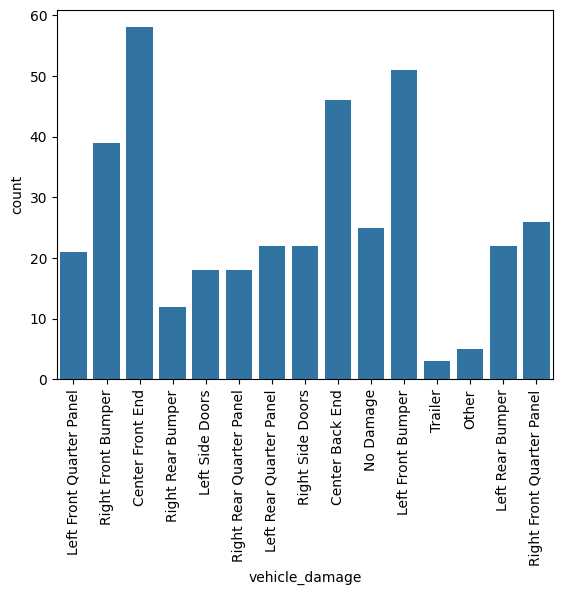

In [10]:
sns.countplot(x=df_v['vehicle_damage'])
plt.xticks(rotation=90)

In [11]:
dr=['Driver Inattention/Distraction', 'Backing Unsafely', 'Failure to Yield Right-of-Way', 'Turning Improperly', 'Driver Inexperience', 'Unsafe Speed', 'Aggressive Driving/Road Rage','Passing Too Closely', 'Passing or Lane Usage Improper', 'Traffic Control Disregarded', 'Other Vehicular', 'Reaction to Uninvolved Vehicle']
mr=['Unspecified','Brakes Defective', 'Physical Disability', 'Oversized Vehicle', 'Pavement Slippery', 'Steering Failure', 'Outside Car Distraction']

In [12]:
df_v['crash_reason'] = df_v['contributing_factor_1'].apply(
    lambda x: 'Driver Error' if x in dr else 'Traffic Error')

df_v.head()

,unique_id,collision_id,crash_time,vehicle_type,contributing_factor_1,vehicle_make,vehicle_year,travel_direction,vehicle_occupants,driver_sex,driver_license_status,driver_license_jurisdiction,pre_crash,point_of_impact,vehicle_damage,public_property_damage,crash_reason
1,19140702,4213082,2024-05-02 08:15:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,TOYT -CAR/SUV,2002,North,1.0,M,Licensed,NY,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,N,Driver Error
5,17044639,3434155,2024-05-02 17:35:00,4 dr sedan,Driver Inattention/Distraction,MERZ -CAR/SUV,2015,East,2.0,M,Licensed,FL,Merging,Right Front Bumper,Right Front Bumper,N,Driver Error
6,19138701,4229067,2024-05-02 13:15:00,Bus,Unspecified,FRHT-TRUCK/BUS,2006,East,13.0,M,Licensed,NY,Parked,Left Front Quarter Panel,Left Front Quarter Panel,N,Traffic Error
7,17303317,3503027,2024-05-02 12:39:00,Station Wagon/Sport Utility Vehicle,Driver Inattention/Distraction,FORD -CAR/SUV,2005,Southwest,2.0,F,Licensed,NY,Going Straight Ahead,Center Front End,Center Front End,N,Driver Error
10,17285715,3487936,2024-05-02 15:40:00,Convertible,Unspecified,VOLK -CAR/SUV,2013,South,1.0,M,Licensed,NY,Stopped in Traffic,Right Rear Bumper,Right Rear Bumper,N,Traffic Error


([0, 1], [Text(0, 0, 'Driver Error'), Text(1, 0, 'Traffic Error')])

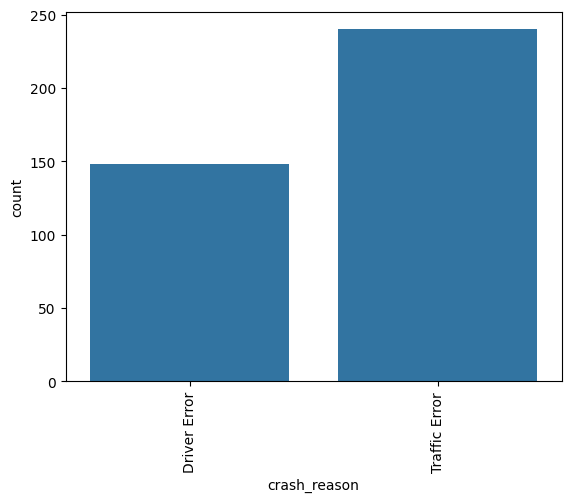

In [13]:
sns.countplot(x=df_v['crash_reason'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Going Straight Ahead'),
  Text(1, 0, 'Merging'),
  Text(2, 0, 'Parked'),
  Text(3, 0, 'Stopped in Traffic'),
  Text(4, 0, 'Entering Parked Position'),
  Text(5, 0, 'Slowing or Stopping'),
  Text(6, 0, 'Making Left Turn'),
  Text(7, 0, 'Making Right Turn'),
  Text(8, 0, 'Backing'),
  Text(9, 0, 'Changing Lanes'),
  Text(10, 0, 'Making U Turn'),
  Text(11, 0, 'Passing'),
  Text(12, 0, 'Other*'),
  Text(13, 0, 'Starting from Parking'),
  Text(14, 0, 'Avoiding Object in Roadway')])

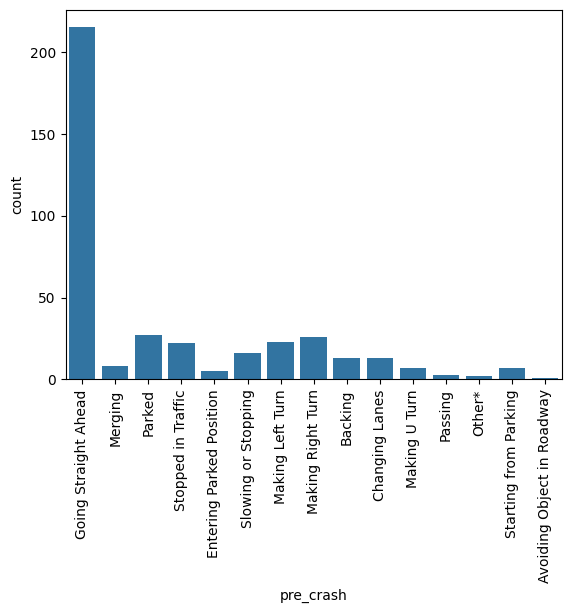

In [14]:
sns.countplot(x=df_v['pre_crash'])
plt.xticks(rotation=90)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [16]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 1 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   unique_id                    388 non-null    int64         
 1   collision_id                 388 non-null    int64         
 2   crash_time                   388 non-null    datetime64[ns]
 3   vehicle_type                 388 non-null    object        
 4   contributing_factor_1        388 non-null    object        
 5   vehicle_make                 388 non-null    object        
 6   vehicle_year                 388 non-null    object        
 7   travel_direction             388 non-null    object        
 8   vehicle_occupants            388 non-null    float64       
 9   driver_sex                   388 non-null    object        
 10  driver_license_status        388 non-null    object        
 11  driver_license_jurisdiction  388 non-null    objec

In [17]:
attributes=df_v.drop(['crash_reason', 'contributing_factor_1', 'crash_time'], axis=1)
target = df_v['crash_reason']

le = LabelEncoder()
for col in attributes.columns:
    if attributes[col].dtype == 'object':
        attributes[col] = le.fit_transform(attributes[col])

In [18]:
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(attributes_scaled, target, test_size=0.2, random_state=42)

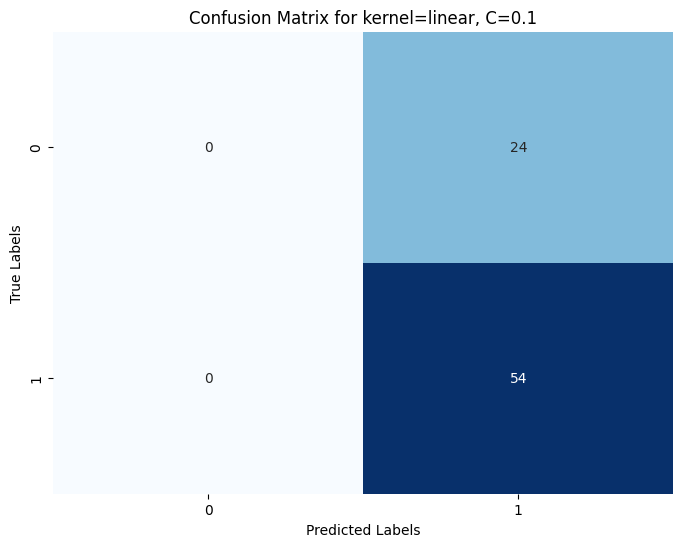

Classification Report for kernel=linear, C=0.1:
               precision    recall  f1-score   support

 Driver Error       0.00      0.00      0.00        24
Traffic Error       0.69      1.00      0.82        54

     accuracy                           0.69        78
    macro avg       0.35      0.50      0.41        78
 weighted avg       0.48      0.69      0.57        78



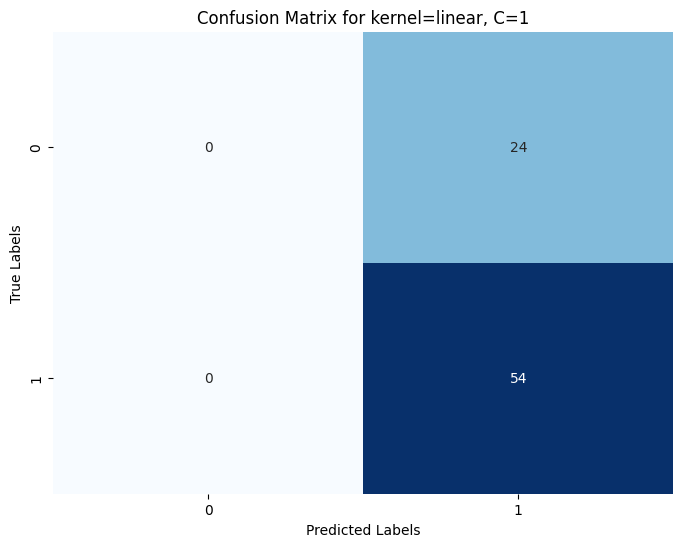

Classification Report for kernel=linear, C=1:
               precision    recall  f1-score   support

 Driver Error       0.00      0.00      0.00        24
Traffic Error       0.69      1.00      0.82        54

     accuracy                           0.69        78
    macro avg       0.35      0.50      0.41        78
 weighted avg       0.48      0.69      0.57        78



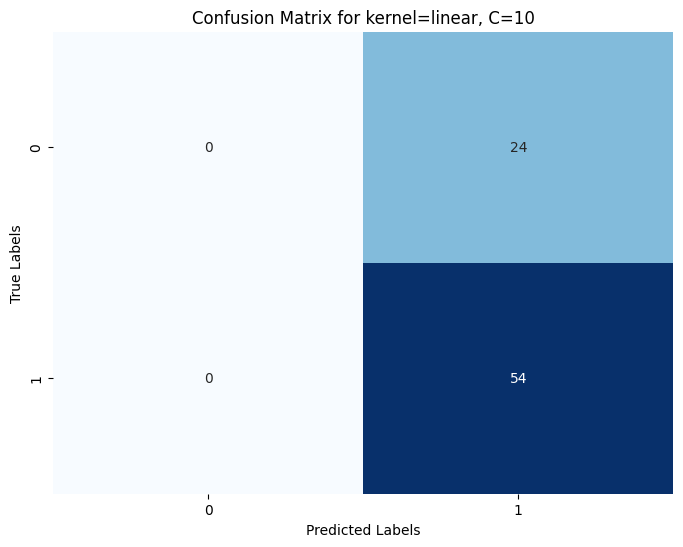

Classification Report for kernel=linear, C=10:
               precision    recall  f1-score   support

 Driver Error       0.00      0.00      0.00        24
Traffic Error       0.69      1.00      0.82        54

     accuracy                           0.69        78
    macro avg       0.35      0.50      0.41        78
 weighted avg       0.48      0.69      0.57        78



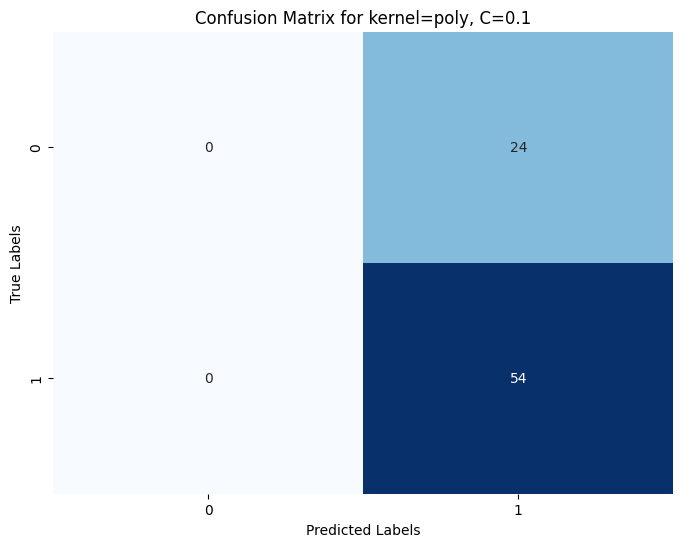

Classification Report for kernel=poly, C=0.1:
               precision    recall  f1-score   support

 Driver Error       0.00      0.00      0.00        24
Traffic Error       0.69      1.00      0.82        54

     accuracy                           0.69        78
    macro avg       0.35      0.50      0.41        78
 weighted avg       0.48      0.69      0.57        78



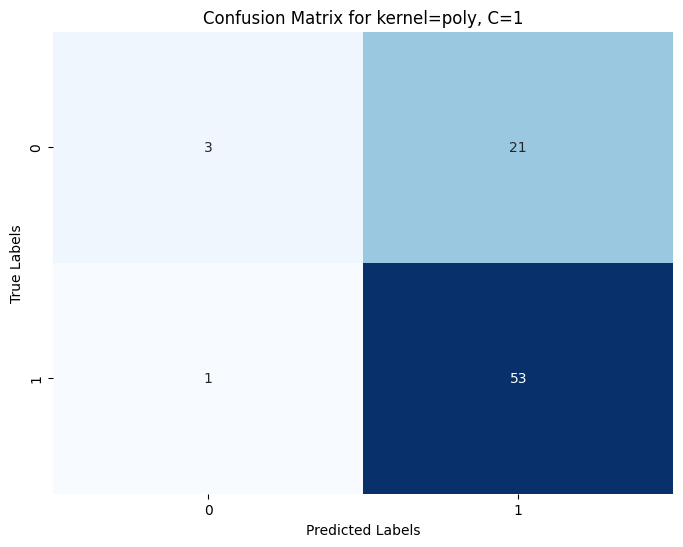

Classification Report for kernel=poly, C=1:
               precision    recall  f1-score   support

 Driver Error       0.75      0.12      0.21        24
Traffic Error       0.72      0.98      0.83        54

     accuracy                           0.72        78
    macro avg       0.73      0.55      0.52        78
 weighted avg       0.73      0.72      0.64        78



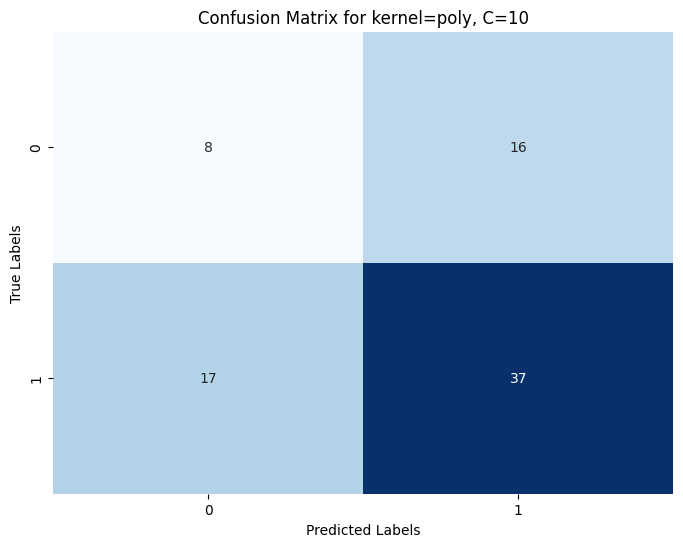

Classification Report for kernel=poly, C=10:
               precision    recall  f1-score   support

 Driver Error       0.32      0.33      0.33        24
Traffic Error       0.70      0.69      0.69        54

     accuracy                           0.58        78
    macro avg       0.51      0.51      0.51        78
 weighted avg       0.58      0.58      0.58        78



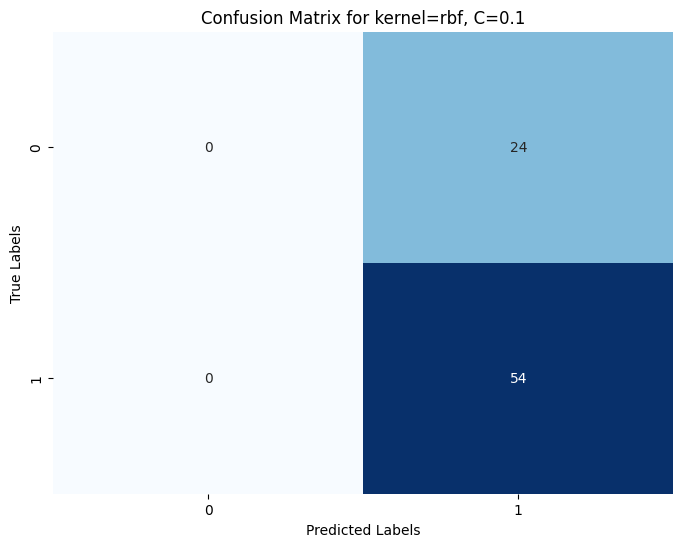

Classification Report for kernel=rbf, C=0.1:
               precision    recall  f1-score   support

 Driver Error       0.00      0.00      0.00        24
Traffic Error       0.69      1.00      0.82        54

     accuracy                           0.69        78
    macro avg       0.35      0.50      0.41        78
 weighted avg       0.48      0.69      0.57        78



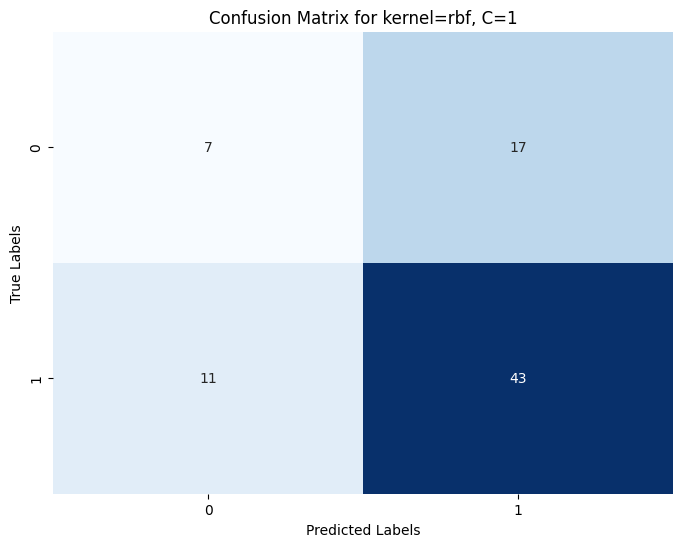

Classification Report for kernel=rbf, C=1:
               precision    recall  f1-score   support

 Driver Error       0.39      0.29      0.33        24
Traffic Error       0.72      0.80      0.75        54

     accuracy                           0.64        78
    macro avg       0.55      0.54      0.54        78
 weighted avg       0.62      0.64      0.62        78



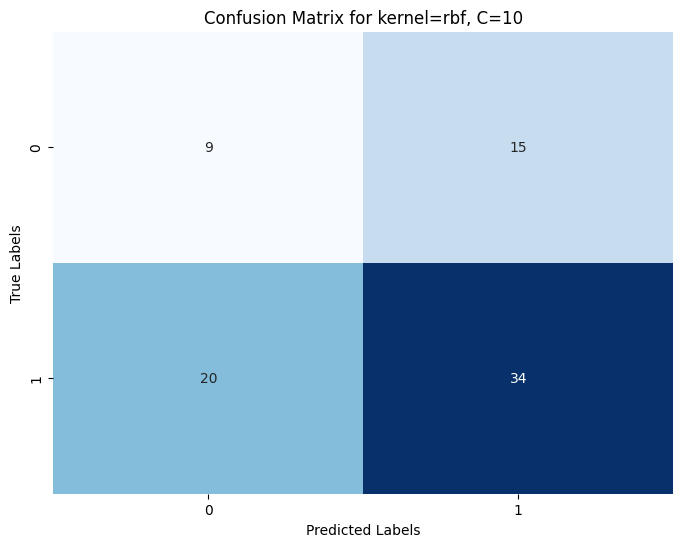

Classification Report for kernel=rbf, C=10:
               precision    recall  f1-score   support

 Driver Error       0.31      0.38      0.34        24
Traffic Error       0.69      0.63      0.66        54

     accuracy                           0.55        78
    macro avg       0.50      0.50      0.50        78
 weighted avg       0.58      0.55      0.56        78



In [20]:
kernel_accuracies=[]
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

for kernel in kernels:
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(X_train, y_train)

        y_pred = svm_model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)

        acc = accuracy_score(y_test, y_pred)
        kernel_accuracies.append(acc)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for kernel={kernel}, C={C}')
        plt.show()
        print(f'Classification Report for kernel={kernel}, C={C}:')
        print(classification_report(y_test, y_pred))


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 5, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [23]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [25]:
print("Best parameters found: ", grid_search.best_params_)

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Best parameters found:  {'C': 1, 'kernel': 'sigmoid'}
               precision    recall  f1-score   support

 Driver Error       0.62      0.21      0.31        24
Traffic Error       0.73      0.94      0.82        54

     accuracy                           0.72        78
    macro avg       0.68      0.58      0.57        78
 weighted avg       0.70      0.72      0.67        78

Accuracy:  0.717948717948718


In [ ]:
|